# Interview Base Assesment-II Q- 9, Q-10

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline


In [6]:
url = 'https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(url)

In [8]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


Insights to be drawn -

● Get all the cars and their types that do not qualify for clean alternative fuel vehicle

● Get all TESLA cars with the model year, and model type made in Bothell City.

● Get all the cars that have an electric range of more than 100, and were made after
2015

● Draw plots to show the distribution between city and electric vehicle type
Question

### Get all the cars and their types that do not qualify for clean alternative fuel vehicle

In [17]:
not_qualify=df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] != 'Clean Alternative Fuel Vehicle Eligible']
cars=df[['Make','Model']]
cars

,Make,Model
0,TESLA,MODEL X
1,HONDA,CLARITY
2,TESLA,MODEL 3
3,NISSAN,LEAF
4,TESLA,MODEL S
...,...,...
130438,TESLA,MODEL Y
130439,NISSAN,LEAF
130440,TESLA,MODEL Y
130441,TESLA,MODEL X


### Get all TESLA cars with the model year, and model type made in Bothell City.

In [24]:
tes=df[df['Make']=='TESLA']
city=tes[tes['City']=='Bothell']
mdl_yr_tp=city[['Model Year','Model']]

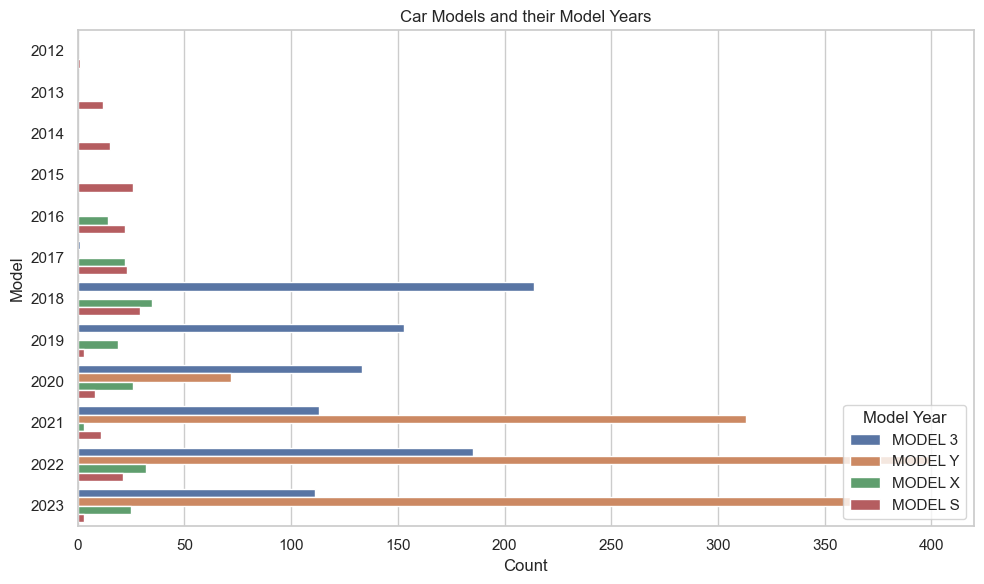

In [29]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=mdl_yr_tp, y="Model Year", hue="Model")
plt.xlabel("Count")
plt.ylabel("Model")
plt.title("Car Models and their Model Years")
plt.legend(title="Model Year")
plt.tight_layout()
plt.show()

### Get all the cars that have an electric range of more than 100, and were made after 2015

In [36]:
er=df[df['Electric Range']>100 & (df['Model Year'] >2015)]
cars=er[['Make','Model','Electric Range','Model Year']]
cars

,Make,Model,Electric Range,Model Year
0,TESLA,MODEL X,238,2018
1,HONDA,CLARITY,47,2021
2,TESLA,MODEL 3,220,2019
3,NISSAN,LEAF,75,2013
4,TESLA,MODEL S,210,2017
...,...,...,...,...
130429,BMW,X5,30,2022
130432,TESLA,MODEL Y,291,2020
130436,TESLA,MODEL 3,215,2018
130437,BMW,530E,21,2021


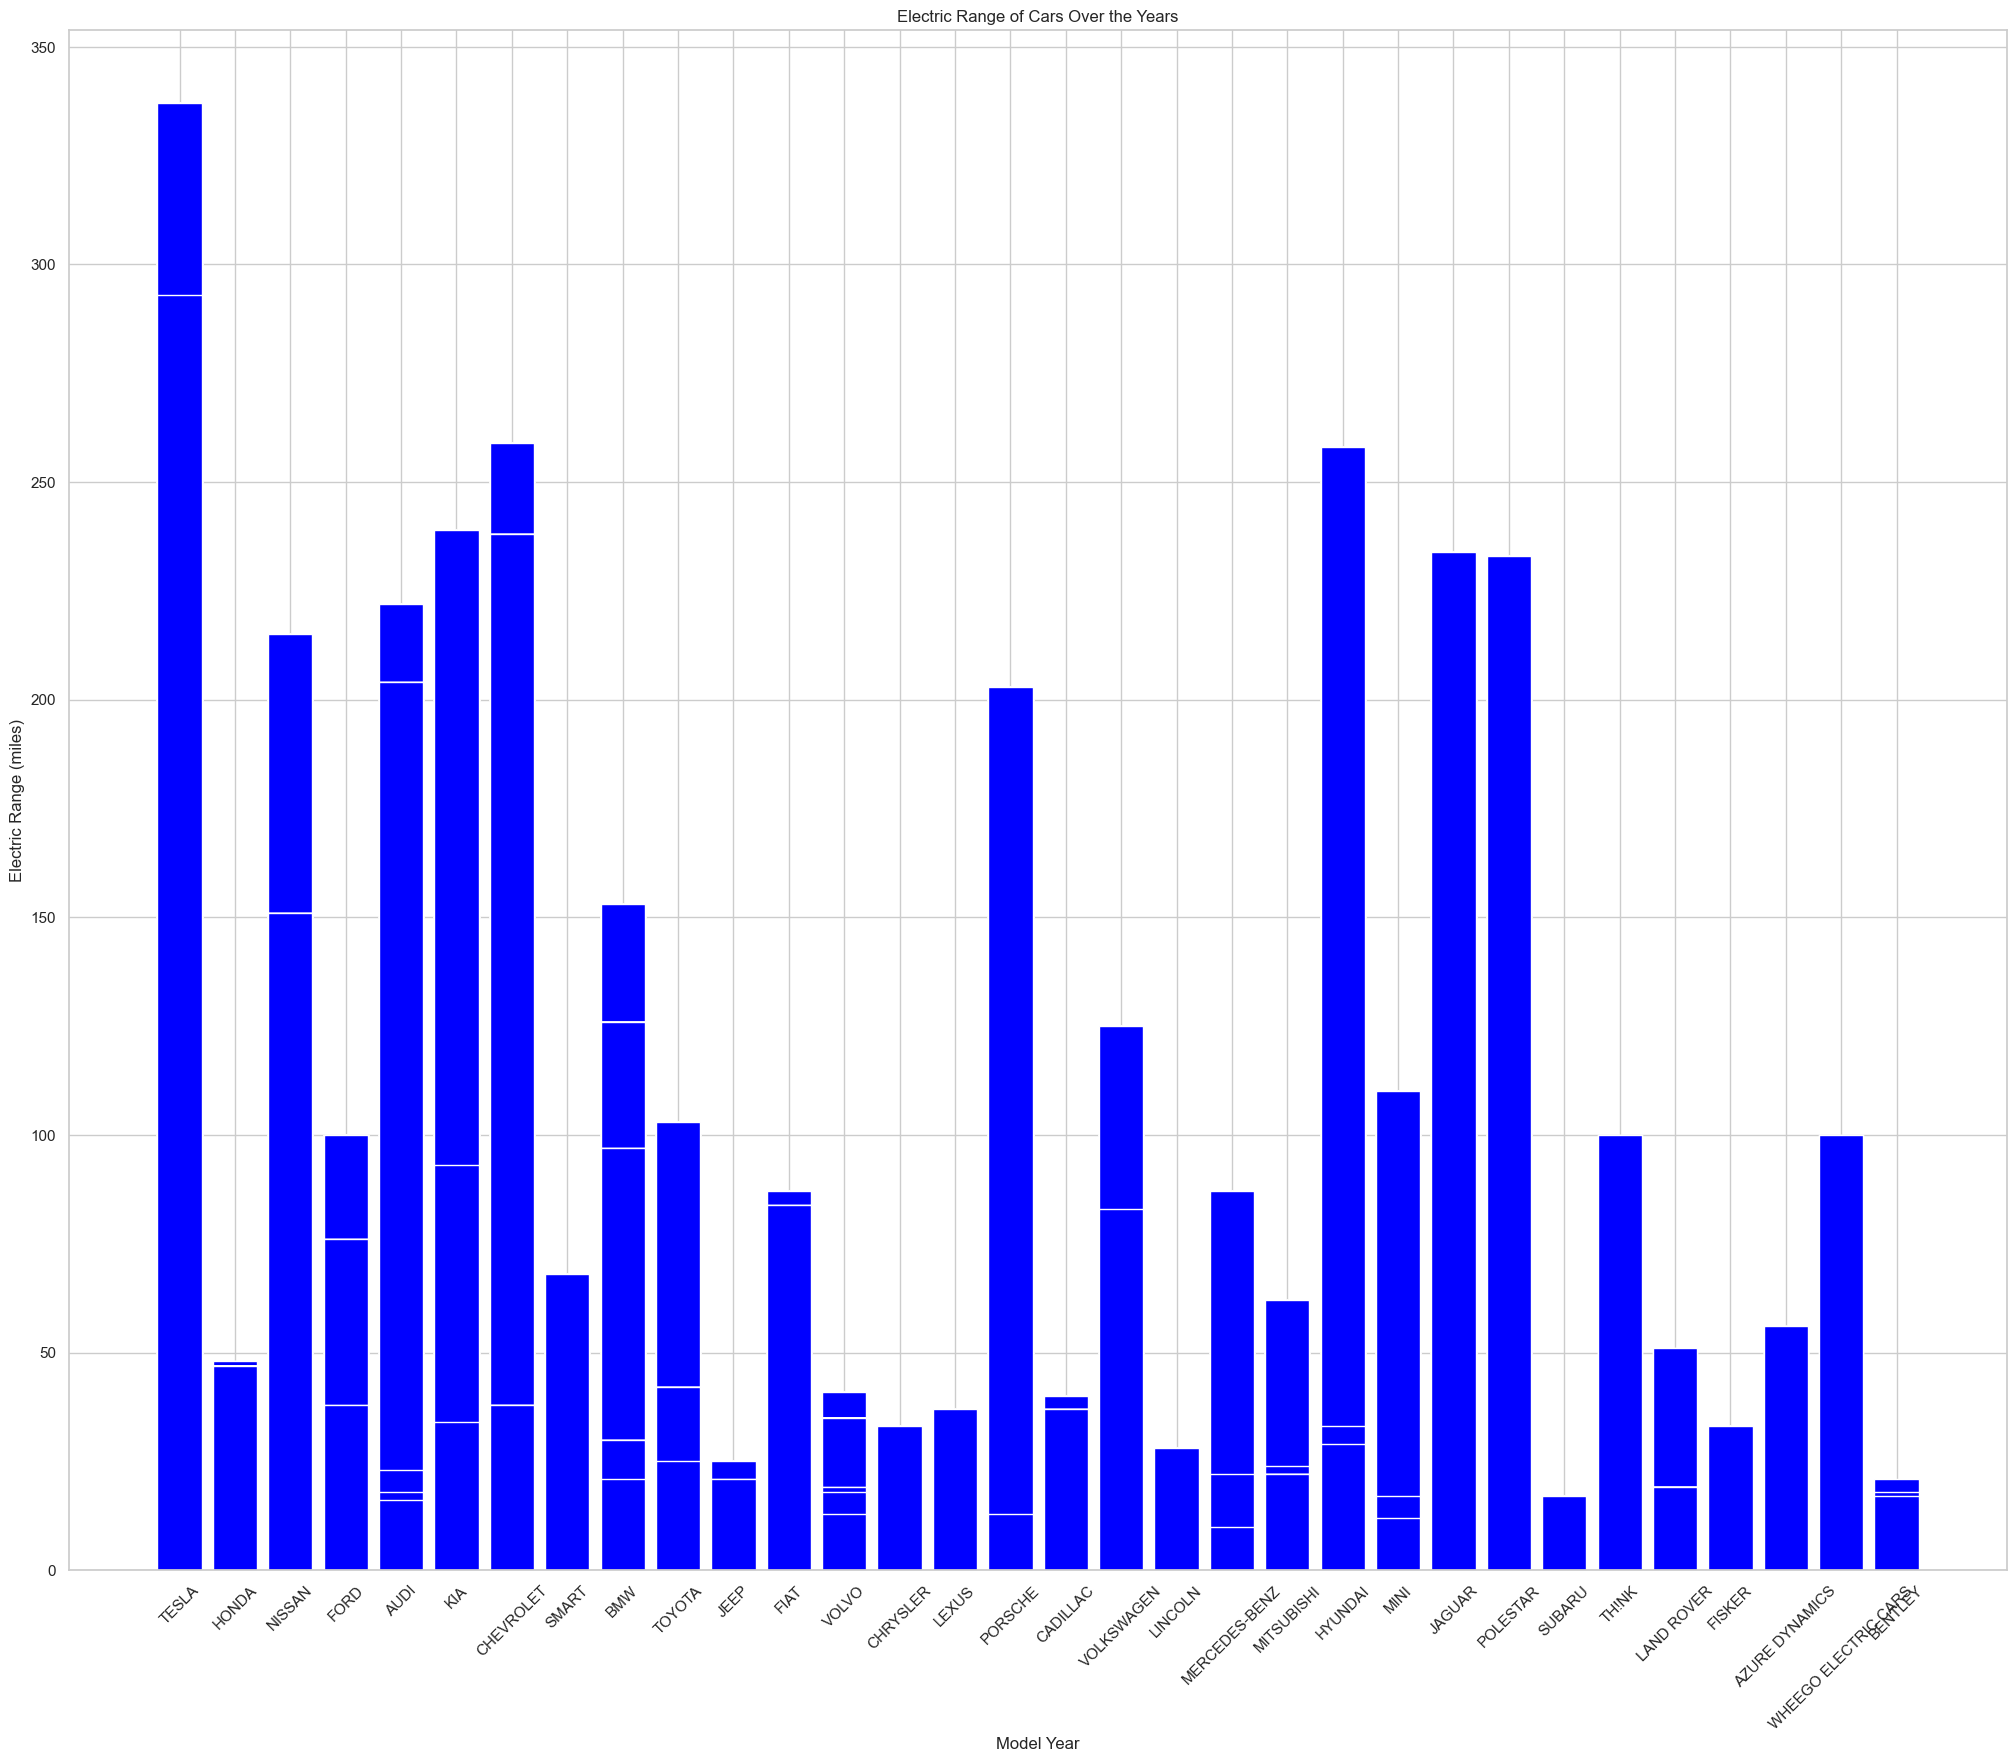

In [45]:
plt.figure(figsize=(25, 20))
plt.bar(cars['Make'], cars['Electric Range'], color='blue')

# Set plot title and axis labels
plt.title('Electric Range of Cars Over the Years')
plt.xlabel('Model Year')
plt.xticks(rotation=45)
plt.ylabel('Electric Range (miles)')

# Show the plot
plt.show()

###  show the distribution between city and electric vehicle type Question

In [53]:
count_data = df.groupby(['City', 'Electric Vehicle Type']).size().unstack()
count_data

Electric Vehicle Type,Battery Electric Vehicle (BEV),Plug-in Hybrid Electric Vehicle (PHEV)
City,,
Aberdeen,73.0,42.0
Acme,3.0,4.0
Addy,1.0,1.0
Aiea,NaN,1.0
Airway Heights,10.0,8.0
...,...,...
Yacolt,19.0,13.0
Yakima,309.0,162.0
Yarrow Point,102.0,24.0


### Write a program to count the number of verbs, nouns, pronouns, and adjectives in a given particular phrase or paragraph, and return their respective count as a dictionary.

Note -

1. Write code comments wherever required for code

2. You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.

In [72]:
def count_pos_tags(text):
    # Split the text into words
    words = text.split()
    
    # Initialize counters for different parts of speech
    verb_count = 0
    noun_count = 0
    pronoun_count = 0
    adjective_count = 0
    
    # Iterate over each word in the text and count the parts of speech
    for word in words:
        if word.endswith('ing') or word.endswith('ed') or word.endswith('s'):
            verb_count += 1
        elif word.endswith('s') or word.endswith('es'):
            noun_count += 1
        elif word.lower() in ['i', 'you', 'he', 'she', 'it', 'we', 'they']:
            pronoun_count += 1
        elif word.endswith('y') and len(word) > 1:
            adjective_count += 1
    
    # Create a dictionary with the counts of each part of speech
    pos_counts = {
        "verbs": verb_count,
        "nouns": noun_count,
        "pronouns": pronoun_count,
        "adjectives": adjective_count
    }
    
    return pos_counts

In [73]:
# Test case
text = "She is dancing happily on the stage."
result = count_pos_tags(text)
print(result)  

{'verbs': 2, 'nouns': 0, 'pronouns': 1, 'adjectives': 1}


In [74]:
text = "The quick brown fox jumps over the lazy dog. They watched a beautiful sunset."
result = count_pos_tags(text)
print(result)  

{'verbs': 2, 'nouns': 0, 'pronouns': 1, 'adjectives': 1}
